## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [2]:
#import for data visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
#import data using pandas
soccer_results = pd.read_csv('..\\results.csv')

In [6]:
soccer_results


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [8]:
#Which teams scored the largest number of goals in FIFA World Cup?
#Filter the data to only include FIFA World Cup matches
world_cup = soccer_results[soccer_results['tournament'] == 'FIFA World Cup']
world_cup

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True


In [9]:
# using the world_cup data, sum the number of goals scored by each home team using home_team column and home_score column
home_goals = world_cup.groupby('home_team')['home_score'].sum().sort_values(ascending=False)
home_goals

home_team
Brazil                  177
Germany                 158
Argentina               114
France                   85
Italy                    72
                       ... 
Trinidad and Tobago       0
United Arab Emirates      0
Haiti                     0
Angola                    0
China PR                  0
Name: home_score, Length: 78, dtype: int64

In [10]:
# using the world_cup data, sum the number of goals scored by each away team using away_team column and away_score column
away_goals = world_cup.groupby('away_team')['away_score'].sum().sort_values(ascending=False)
away_goals


away_team
Germany                68
Uruguay                56
Italy                  56
Brazil                 52
Spain                  50
                       ..
DR Congo                0
Indonesia               0
Canada                  0
China PR                0
Trinidad and Tobago     0
Name: away_score, Length: 79, dtype: int64

In [11]:
#combine the home_goals and away_goals data to get the total number of goals scored by each team
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
total_goals

Brazil                 229.0
Germany                226.0
Argentina              137.0
Italy                  128.0
France                 120.0
                       ...  
Canada                   0.0
Trinidad and Tobago      0.0
China PR                 0.0
Indonesia                0.0
DR Congo                 0.0
Length: 81, dtype: float64

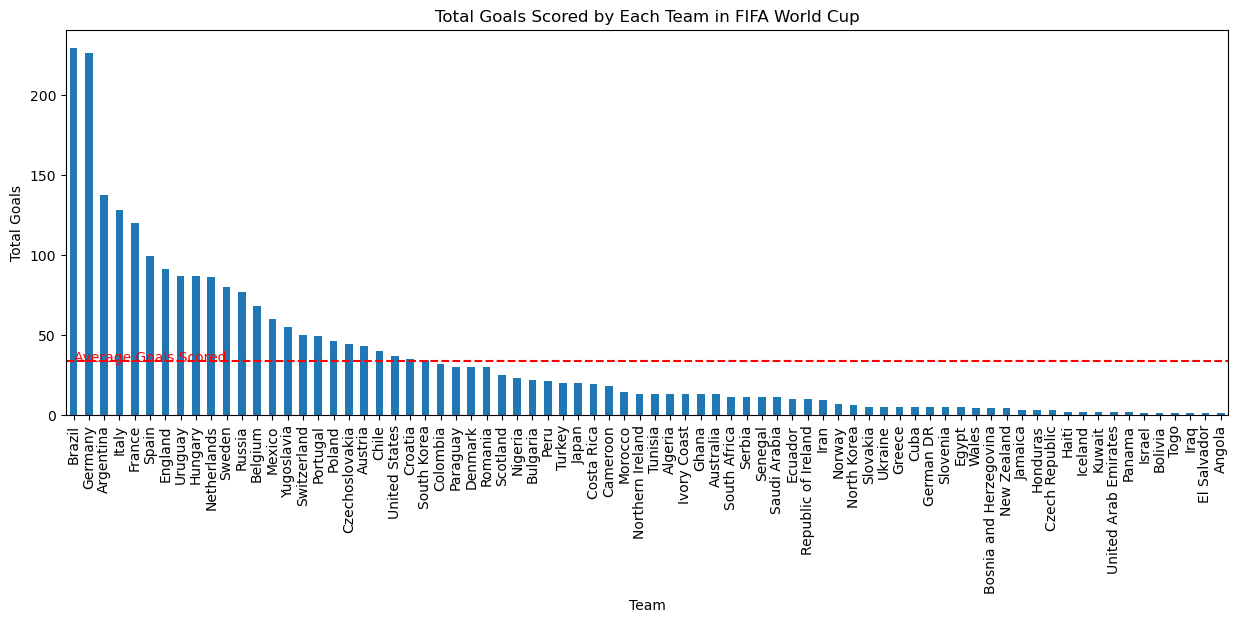

In [16]:
#plot total goals scored by each team
#exclude the teams that have not scored any goals
total_goals = total_goals[total_goals > 0]
total_goals.plot(kind='bar', figsize=(15, 5))
plt.title('Total Goals Scored by Each Team in FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Total Goals')
# add a reference line to show the average number of goals scored by each team
plt.axhline(y=total_goals.mean(), color='r', linestyle='--')
#add a label to the reference line
plt.text(0, total_goals.mean(), 'Average Goals Scored', color='red')


plt.show()



## Task
What is the number of matches played in each tournament throughout history?

In [17]:
#Count the number of matches played in each tournament
#group the data by tournament and count the number of matches played in each tournament
matches_played = soccer_results['tournament'].value_counts()
matches_played


tournament
Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: count, Length: 112, dtype: int64

## Task 
Show the trend in number of matches per year.

In [20]:
#count the number of matches grouped by tournament and year
#extract the year from the date column
soccer_results['year'] = pd.to_datetime(soccer_results['date']).dt.year
matches_played_by_year = soccer_results.groupby(['tournament', 'year']).size()
matches_played_by_year


tournament                   year
ABCS Tournament              2010    4
                             2011    4
                             2012    4
                             2013    4
                             2015    4
                                    ..
Windward Islands Tournament  2013    1
                             2014    2
                             2015    3
                             2017    6
World Unity Cup              2016    4
Length: 1504, dtype: int64

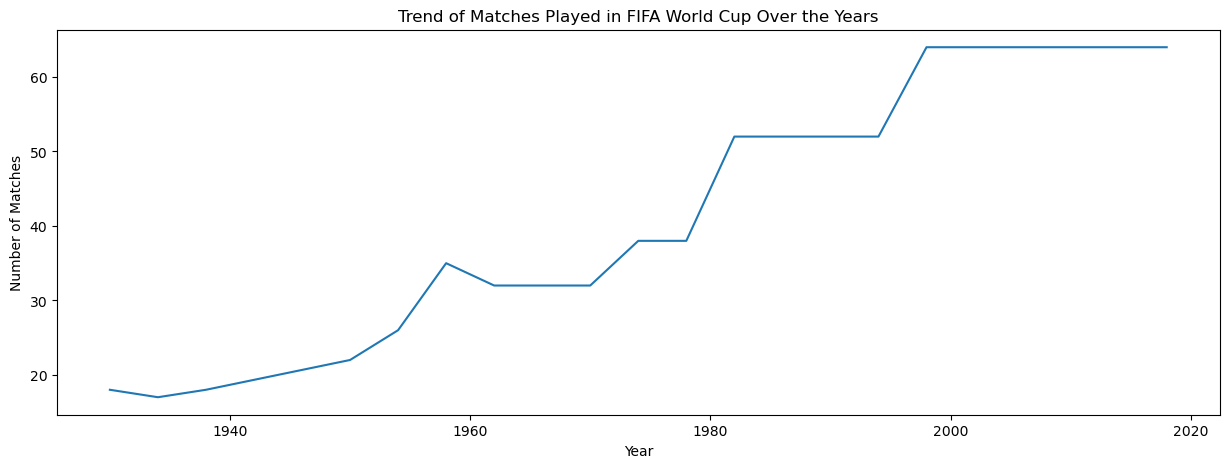

In [26]:
#show the trend of matches played in FIFA World Cup over the years
#filter the data to only include FIFA World Cup matches
world_cup = matches_played_by_year['FIFA World Cup']
world_cup
world_cup.plot(kind='line', figsize=(15, 5))
plt.title('Trend of Matches Played in FIFA World Cup Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()



## Task
Which teams are the most successful ones? (winning percentage)

In [27]:
#Which teams are the most successful in FIFA World Cup? (winning percentage)
#filter the data to only include FIFA World Cup matches
world_cup = soccer_results[soccer_results['tournament'] == 'FIFA World Cup']
world_cup



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930
...,...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018
39946,2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,2018
39947,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,2018
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,2018


In [28]:
#count the number of matches played by each team
home_matches = world_cup['home_team'].value_counts()
away_matches = world_cup['away_team'].value_counts()
total_matches = home_matches.add(away_matches, fill_value=0)
total_matches





Algeria                 13.0
Angola                   3.0
Argentina               81.0
Australia               16.0
Austria                 29.0
                        ... 
United Arab Emirates     3.0
United States           33.0
Uruguay                 56.0
Wales                    5.0
Yugoslavia              33.0
Name: count, Length: 81, dtype: float64

In [29]:
#count the number of matches won by each team
home_wins = world_cup[world_cup['home_score'] > world_cup['away_score']]['home_team'].value_counts()
away_wins = world_cup[world_cup['away_score'] > world_cup['home_score']]['away_team'].value_counts()
total_wins = home_wins.add(away_wins, fill_value=0)
total_wins



Algeria           3.0
Argentina        43.0
Australia         2.0
Austria          12.0
Belgium          20.0
                 ... 
Ukraine           2.0
United States     8.0
Uruguay          24.0
Wales             1.0
Yugoslavia       14.0
Name: count, Length: 62, dtype: float64

In [30]:
#calculate the winning percentage for each team
winning_percentage = (total_wins / total_matches * 100).sort_values(ascending=False)
winning_percentage



Brazil                  66.972477
Germany                 61.467890
Italy                   54.216867
Netherlands             54.000000
Argentina               53.086420
                          ...    
New Zealand                   NaN
Panama                        NaN
Togo                          NaN
Trinidad and Tobago           NaN
United Arab Emirates          NaN
Name: count, Length: 81, dtype: float64

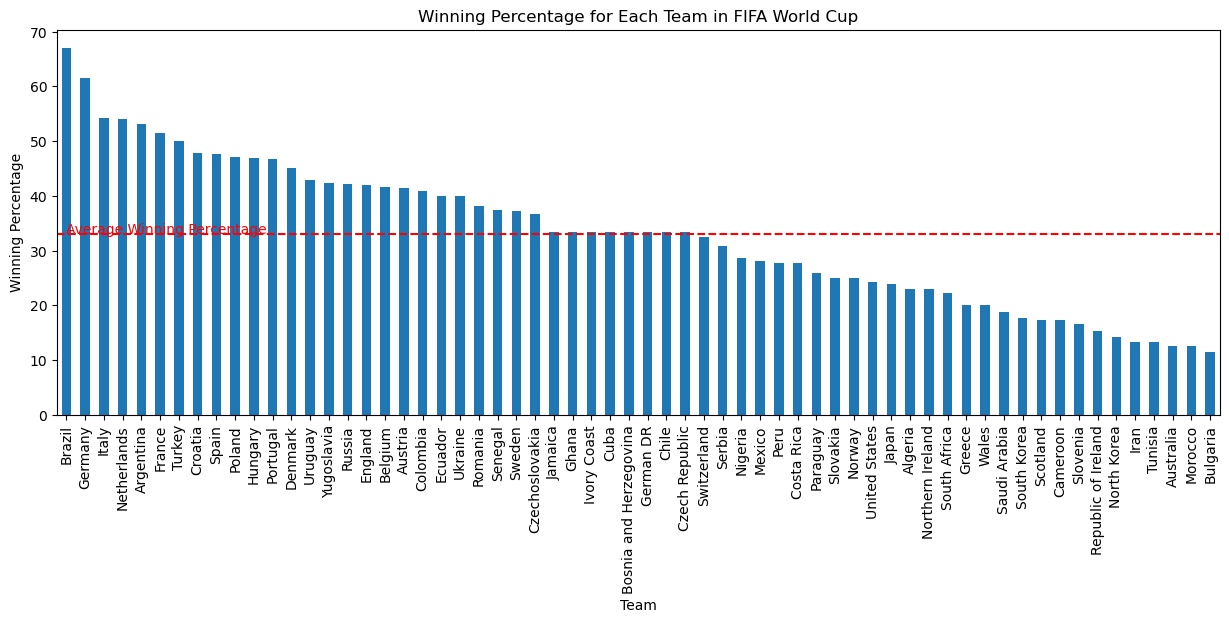

In [31]:
#plot the winning percentage for each team
#exclude the teams that have not won any matches
winning_percentage = winning_percentage[winning_percentage > 0]
winning_percentage.plot(kind='bar', figsize=(15, 5))
plt.title('Winning Percentage for Each Team in FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
# add a reference line to show the average winning percentage
plt.axhline(y=winning_percentage.mean(), color='r', linestyle='--')
#add a label to the reference line
plt.text(0, winning_percentage.mean(), 'Average Winning Percentage', color='red')
plt.show()

## Task
Which teams are the least successful ones? (winning percentage)

In [35]:
#extract the least successful teams by sorting the winning_percentage in ascending order
least_successful_teams = winning_percentage.sort_values()
least_successful_teams = least_successful_teams.head(10)
least_successful_teams



Bulgaria               11.538462
Morocco                12.500000
Australia              12.500000
Tunisia                13.333333
Iran                   13.333333
North Korea            14.285714
Republic of Ireland    15.384615
Slovenia               16.666667
Cameroon               17.391304
Scotland               17.391304
Name: count, dtype: float64

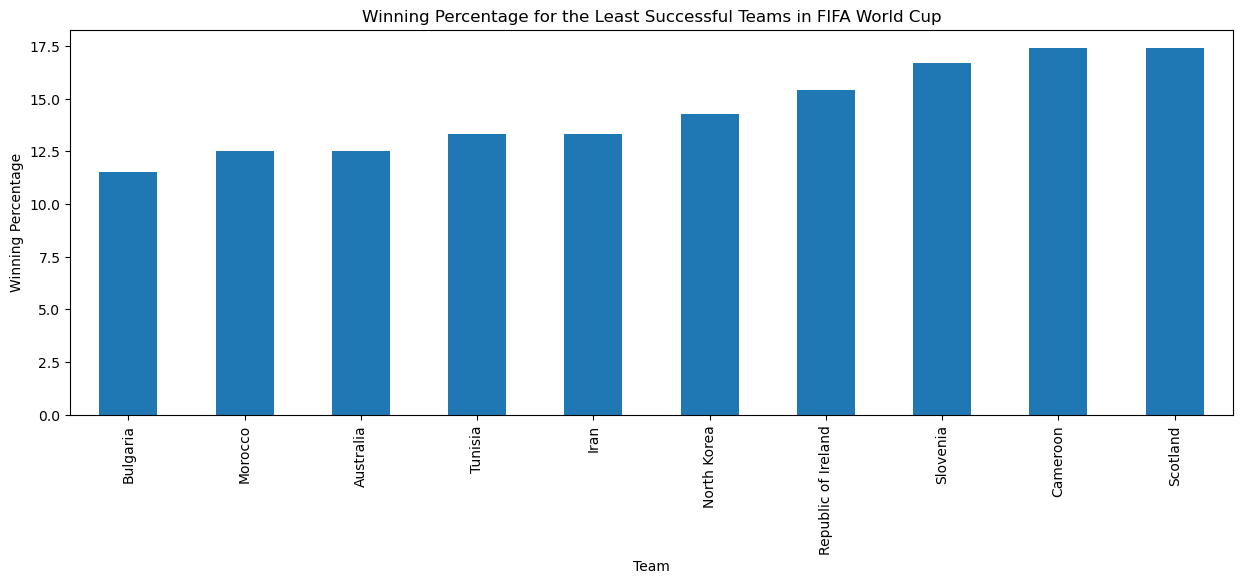

In [36]:
#plot the winning percentage for the least successful teams
least_successful_teams.plot(kind='bar', figsize=(15, 5))
plt.title('Winning Percentage for the Least Successful Teams in FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.show()


## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [38]:
#extract month from date column
soccer_results['month'] = pd.to_datetime(soccer_results['date']).dt.month
soccer_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3
...,...,...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True,2020,1
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True,2020,1
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True,2020,1
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True,2020,1


In [39]:
#which months have the most matches?
#count the number of matches played in each month
matches_by_month = soccer_results['month'].value_counts().sort_index()
matches_by_month

month
1     2218
2     2564
3     4039
4     2538
5     3231
6     5969
7     2770
8     2752
9     4296
10    4642
11    4293
12    2274
Name: count, dtype: int64

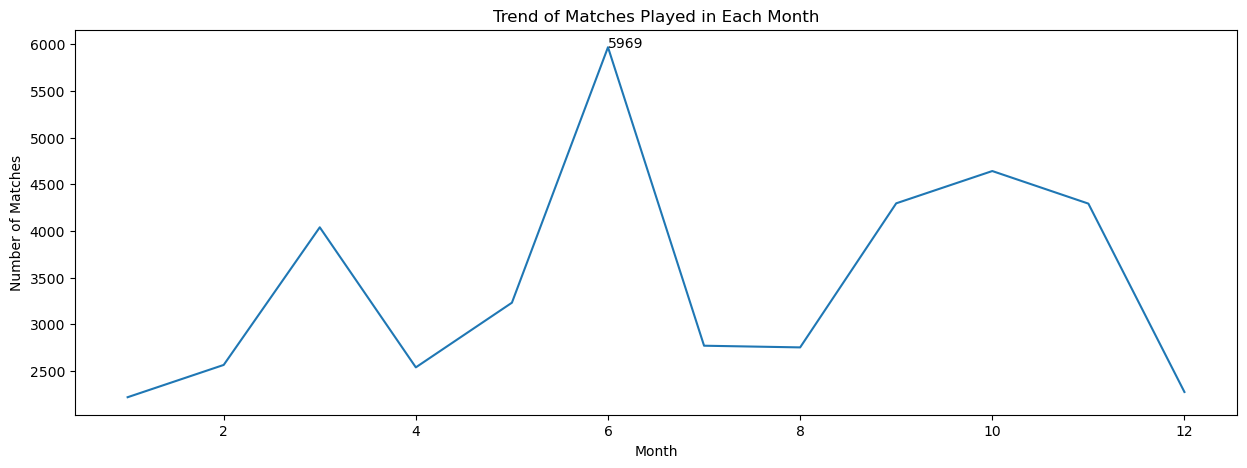

In [41]:
#plot a trend of matches played in each month
matches_by_month.plot(kind='line', figsize=(15, 5))
plt.title('Trend of Matches Played in Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
#add a label to month six indicating the number of matches played in June
plt.text(6, matches_by_month[6], matches_by_month[6])

plt.show()


## Task
Which teams played against each other the most?

In [42]:
#Which team played against eachother the most?
#count the number of matches played by each pair of teams
team_pairs = soccer_results.groupby(['home_team', 'away_team']).size()
team_pairs = team_pairs.sort_values(ascending=False)
team_pairs

home_team  away_team 
Argentina  Uruguay       96
Uruguay    Argentina     80
Austria    Hungary       68
Hungary    Austria       65
Kenya      Uganda        65
                         ..
Palestine  Maldives       1
Gabon      Botswana       1
           Brazil         1
           Cape Verde     1
Abkhazia   Artsakh        1
Length: 10976, dtype: int64

In [43]:
top_team_pairs = team_pairs.head(25)

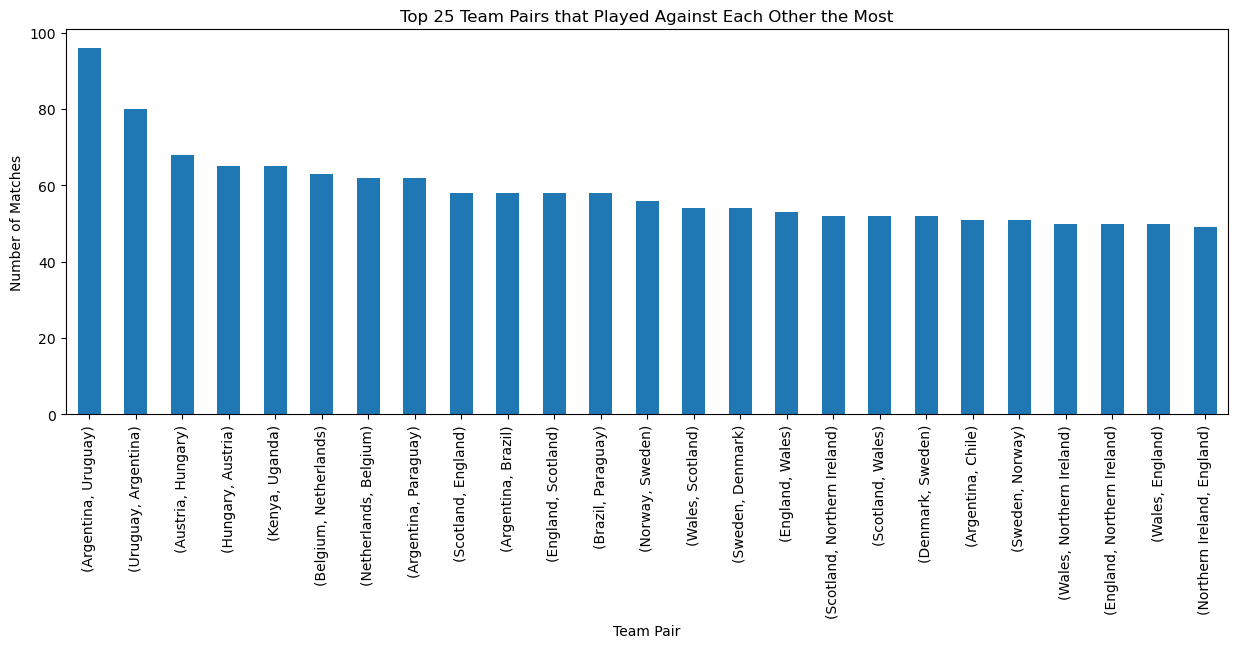

In [44]:
#plot the top 25 team pairs that played against each other the most
top_team_pairs.plot(kind='bar', figsize=(15, 5))
plt.title('Top 25 Team Pairs that Played Against Each Other the Most')
plt.xlabel('Team Pair')
plt.ylabel('Number of Matches')
plt.show()


## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.